<a href="https://colab.research.google.com/github/EccoAtSix/Box-Jenkins/blob/main/hapag_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
hapag=pd.read_excel("/content/Base de datos.xlsx",sheet_name="Hapag",index_col=0)
hapag.head()

,Validity To,Container Type,Currency All-in Rate,All-in Rate,Currency Ocean Freight,Ocean Freight Rate
Validity From,,,,,,
2021-12-01,2021-12-31,20GP,USD,7696,USD,7696
2022-01-01,2022-01-20,20GP,USD,7448,USD,7448
2022-01-21,2022-02-14,20GP,USD,6448,USD,6448
2022-02-15,2022-02-20,20GP,USD,6448,USD,6448
2022-02-21,2022-02-28,20GP,USD,6448,USD,6448


In [ ]:
freight_df = pd.DataFrame({'Ocean Freight rate':hapag["Ocean Freight Rate"]})
freight_df['Seconds'] = freight_df.index.map(pd.Timestamp.timestamp)
freight_df

,Ocean Freight rate,Seconds
Validity From,,
2021-12-01,7696,1.638317e+09
2022-01-01,7448,1.640995e+09
2022-01-21,6448,1.642723e+09
2022-02-15,6448,1.644883e+09
2022-02-21,6448,1.645402e+09
...,...,...
2023-01-13,52,1.673568e+09
2023-02-01,302,1.675210e+09
2023-02-07,302,1.675728e+09


In [ ]:
day = 60*60*24 #segundos por día
year = 365.2425*day #segundos por año

freight_df['Day sin'] = np.sin(freight_df['Seconds'] * (2* np.pi / day))
freight_df['Day cos'] = np.cos(freight_df['Seconds'] * (2 * np.pi / day))
freight_df['Year sin'] = np.sin(freight_df['Seconds'] * (2 * np.pi / year))
freight_df['Year cos'] = np.cos(freight_df['Seconds'] * (2 * np.pi / year))
freight_df.head()

,Ocean Freight rate,Seconds,Day sin,Day cos,Year sin,Year cos
Validity From,,,,,,
2021-12-01,7696,1.638317e+09,-1.093976e-11,1.0,-0.502577,0.864532
2022-01-01,7448,1.640995e+09,-8.652299e-12,1.0,0.006709,0.999977
2022-01-21,6448,1.642723e+09,-9.993018e-12,1.0,0.343616,0.939110
2022-02-15,6448,1.644883e+09,-4.392959e-12,1.0,0.703872,0.710327
2022-02-21,6448,1.645402e+09,-7.705558e-12,1.0,0.773313,0.634024


In [ ]:
def df_to_X_y2(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
#freight_df=freight_df.drop("Seconds",axis=1)
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#freight_sc=sc.fit_transform(freight_df["Ocean Freight rate"])
#freight_sc=pd.DataFrame(freight_sc)
freight_df.head()

,Ocean Freight rate,Day sin,Day cos,Year sin,Year cos
Validity From,,,,,
2021-12-01,7696,-1.093976e-11,1.0,-0.502577,0.864532
2022-01-01,7448,-8.652299e-12,1.0,0.006709,0.999977
2022-01-21,6448,-9.993018e-12,1.0,0.343616,0.939110
2022-02-15,6448,-4.392959e-12,1.0,0.703872,0.710327
2022-02-21,6448,-7.705558e-12,1.0,0.773313,0.634024


In [ ]:
freight_sc=(freight_df["Ocean Freight rate"]-np.mean(freight_df["Ocean Freight rate"]))/np.std(freight_df["Ocean Freight rate"])
freight_sc

Validity From
2021-12-01    1.759329
2022-01-01    1.660384
2022-01-21    1.261411
2022-02-15    1.261411
2022-02-21    1.261411
                ...   
2023-01-13   -1.290419
2023-02-01   -1.190676
2023-02-07   -1.190676
2023-02-15   -1.110881
2023-02-17   -1.110881
Name: Ocean Freight rate, Length: 68, dtype: float64

In [ ]:
standard_freight=pd.DataFrame({"Ocean Freight":freight_sc})
new=freight_df.iloc[:,[1,2,3,4]]
data_final=pd.concat([standard_freight,new],axis=1)
data_final.head()

,Ocean Freight,Day sin,Day cos,Year sin,Year cos
Validity From,,,,,
2021-12-01,1.759329,-1.093976e-11,1.0,-0.502577,0.864532
2022-01-01,1.660384,-8.652299e-12,1.0,0.006709,0.999977
2022-01-21,1.261411,-9.993018e-12,1.0,0.343616,0.939110
2022-02-15,1.261411,-4.392959e-12,1.0,0.703872,0.710327
2022-02-21,1.261411,-7.705558e-12,1.0,0.773313,0.634024


In [ ]:
data_final

,Ocean Freight,Day sin,Day cos,Year sin,Year cos
Validity From,,,,,
2021-12-01,1.759329,-1.093976e-11,1.0,-0.502577,0.864532
2022-01-01,1.660384,-8.652299e-12,1.0,0.006709,0.999977
2022-01-21,1.261411,-9.993018e-12,1.0,0.343616,0.939110
2022-02-15,1.261411,-4.392959e-12,1.0,0.703872,0.710327
2022-02-21,1.261411,-7.705558e-12,1.0,0.773313,0.634024
...,...,...,...,...,...
2023-01-13,-1.290419,-3.365829e-12,1.0,0.207453,0.978245
2023-02-01,-1.190676,-9.005086e-12,1.0,0.510549,0.859848
2023-02-07,-1.190676,-1.231769e-11,1.0,0.596425,0.802669


In [ ]:
xtrain,ytrain=df_to_X_y2(data_final,window_size=3)
xtrain.shape,ytrain.shape

((65, 3, 5), (65,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(InputLayer((3,5)))
model.add(LSTM(40)) #64
model.add(Dense(8,"relu")) #8
model.add(Dense(1,"linear")) #1
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 40)                7360      
                                                                 
 dense_2 (Dense)             (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 7,697
Trainable params: 7,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1=ModelCheckpoint("model/",save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(xtrain,ytrain,epochs=20,callbacks=[cp1])

Epoch 1/20
1/3 [=========>....................] - ETA: 4s - loss: 0.7990 - root_mean_squared_error: 0.8939

3/3 [==============================] - 2s 10ms/step - loss: 0.8606 - root_mean_squared_error: 0.9277
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.7419 - root_mean_squared_error: 0.8613

3/3 [==============================] - 0s 9ms/step - loss: 0.7738 - root_mean_squared_error: 0.8796
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.7938 - root_mean_squared_error: 0.8909

3/3 [==============================] - 0s 8ms/step - loss: 0.7042 - root_mean_squared_error: 0.8392
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.7006 - root_mean_squared_error: 0.8370

3/3 [==============================] - 0s 9ms/step - loss: 0.6446 - root_mean_squared_error: 0.8029
Epoch 5/20
1/3 [=========>....................] - ETA: 0s - loss: 0.6094 - root_mean_squared_error: 0.7807

3/3 [==============================] - 0s 10ms/step - loss: 0.5902 - root_mean_squared_error: 0.7682
Epoch 6/20
1/3 [=========>....................] - ETA: 0s - loss: 0.5150 - root_mean_squared_error: 0.7176

3/3 [==============================] - 0s 7ms/step - loss: 0.5356 - root_mean_squared_error: 0.7318
Epoch 7/20
1/3 [=========>....................] - ETA: 0s - loss: 0.5076 - root_mean_squared_error: 0.7125

3/3 [==============================] - 0s 9ms/step - loss: 0.4797 - root_mean_squared_error: 0.6926
Epoch 8/20
1/3 [=========>....................] - ETA: 0s - loss: 0.4494 - root_mean_squared_error: 0.6704

3/3 [==============================] - 0s 8ms/step - loss: 0.4262 - root_mean_squared_error: 0.6529
Epoch 9/20
1/3 [=========>....................] - ETA: 0s - loss: 0.4046 - root_mean_squared_error: 0.6361

3/3 [==============================] - 0s 11ms/step - loss: 0.3730 - root_mean_squared_error: 0.6107
Epoch 10/20
1/3 [=========>....................] - ETA: 0s - loss: 0.3161 - root_mean_squared_error: 0.5623

3/3 [==============================] - 0s 8ms/step - loss: 0.3265 - root_mean_squared_error: 0.5714
Epoch 11/20
1/3 [=========>....................] - ETA: 0s - loss: 0.3515 - root_mean_squared_error: 0.5929

3/3 [==============================] - 0s 7ms/step - loss: 0.2880 - root_mean_squared_error: 0.5366
Epoch 12/20
1/3 [=========>....................] - ETA: 0s - loss: 0.2314 - root_mean_squared_error: 0.4810

3/3 [==============================] - 0s 8ms/step - loss: 0.2564 - root_mean_squared_error: 0.5064
Epoch 13/20
1/3 [=========>....................] - ETA: 0s - loss: 0.3094 - root_mean_squared_error: 0.5562

3/3 [==============================] - 0s 8ms/step - loss: 0.2322 - root_mean_squared_error: 0.4819
Epoch 14/20
1/3 [=========>....................] - ETA: 0s - loss: 0.1870 - root_mean_squared_error: 0.4324

3/3 [==============================] - 0s 8ms/step - loss: 0.2110 - root_mean_squared_error: 0.4594
Epoch 15/20
1/3 [=========>....................] - ETA: 0s - loss: 0.2072 - root_mean_squared_error: 0.4552

3/3 [==============================] - 0s 8ms/step - loss: 0.1958 - root_mean_squared_error: 0.4425
Epoch 16/20
1/3 [=========>....................] - ETA: 0s - loss: 0.2364 - root_mean_squared_error: 0.4862

3/3 [==============================] - 0s 7ms/step - loss: 0.1829 - root_mean_squared_error: 0.4276
Epoch 17/20
1/3 [=========>....................] - ETA: 0s - loss: 0.1693 - root_mean_squared_error: 0.4114

3/3 [==============================] - 0s 7ms/step - loss: 0.1698 - root_mean_squared_error: 0.4120
Epoch 18/20
1/3 [=========>....................] - ETA: 0s - loss: 0.1610 - root_mean_squared_error: 0.4013

3/3 [==============================] - 0s 9ms/step - loss: 0.1548 - root_mean_squared_error: 0.3935
Epoch 19/20
1/3 [=========>....................] - ETA: 0s - loss: 0.1366 - root_mean_squared_error: 0.3696

3/3 [==============================] - 0s 13ms/step - loss: 0.1401 - root_mean_squared_error: 0.3743
Epoch 20/20
1/3 [=========>....................] - ETA: 0s - loss: 0.1338 - root_mean_squared_error: 0.3658

3/3 [==============================] - 0s 8ms/step - loss: 0.1276 - root_mean_squared_error: 0.3572


In [ ]:
train_predictions = model.predict(xtrain).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals freight pct change':ytrain})
train_results

3/3 [==============================] - 0s 3ms/step


,Train Predictions,Actuals freight pct change
0,0.684448,1.261411
1,0.665431,1.261411
2,0.643524,1.261411
3,0.648463,1.221514
4,0.646176,1.141719
...,...,...
60,-1.240993,-1.290419
61,-1.248129,-1.190676
62,-1.216283,-1.190676
63,-1.172784,-1.110881


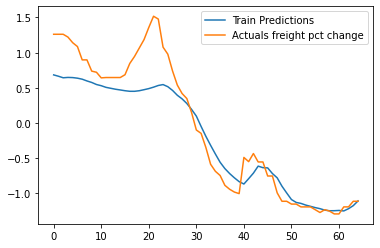

In [ ]:
train_results.plot()

In [ ]:
predictions_real=(train_results["Train Predictions"]*np.std(freight_df["Ocean Freight rate"]))+np.mean(freight_df["Ocean Freight rate"])
predictions_real=pd.DataFrame(predictions_real)
predictions_real.index=freight_df.iloc[3:,:].index
predictions_real["Ocean Freight rate"]=freight_df["Ocean Freight rate"]

predictions_real.plot()
predictions_real.head()

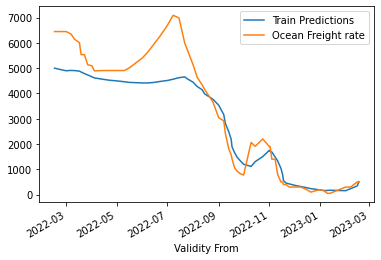

In [ ]:
predictions_real.plot()

In [ ]:
predictions_real.tail(10)

,Train Predictions,Ocean Freight rate
Validity From,,
2022-12-16,276.675781,202
2022-12-21,238.938965,102
2023-01-01,187.642090,202
2023-01-06,164.730225,152
2023-01-10,166.262451,52
2023-01-13,175.882568,52
2023-02-01,157.996826,302
2023-02-07,237.816650,302
2023-02-15,346.844238,502


In [ ]:
u=np.mean(freight_df["Ocean Freight rate"])
sigma=np.std(freight_df["Ocean Freight rate"])
u,sigma

(3286.3529411764707, 2506.436278186421)

In [ ]:
data_final.head()
data_final2=data_final.append({"Ocean Freight":0,"Day sin":0,"Day cos":0,"Year sin":0,"Year cos":0},ignore_index=True)
xtrain2,ytrain2=df_to_X_y2(data_final2,window_size=3)
train_predictions2 = model.predict(xtrain2).flatten()
train_predictions2

3/3 [==============================] - 0s 3ms/step


array([ 0.6844479 ,  0.66543114,  0.6435236 ,  0.6484635 ,  0.64617634,
        0.63777167,  0.62339777,  0.59840024,  0.5770331 ,  0.54784083,
        0.5308394 ,  0.5075534 ,  0.49416944,  0.48074892,  0.4705229 ,
        0.45954958,  0.45147404,  0.4513569 ,  0.45947006,  0.47409567,
        0.4897835 ,  0.5101373 ,  0.5339457 ,  0.54679275,  0.516854  ,
        0.46375197,  0.39498952,  0.34400246,  0.27855918,  0.1937366 ,
        0.09909223, -0.04771235, -0.18774316, -0.3159861 , -0.43883285,
       -0.5568115 , -0.64636415, -0.71707714, -0.7775637 , -0.83191967,
       -0.8657474 , -0.7896903 , -0.7111082 , -0.6115572 , -0.6334903 ,
       -0.636728  , -0.71716154, -0.77787566, -0.89613676, -0.99303234,
       -1.0863707 , -1.1273416 , -1.1411413 , -1.1648477 , -1.1828396 ,
       -1.2007794 , -1.2158355 , -1.2363015 , -1.2454427 , -1.2448314 ,
       -1.2409933 , -1.2481291 , -1.2162832 , -1.1727842 , -1.1059341 ,
       -1.0722153 ], dtype=float32)

In [ ]:
first_march=((((train_predictions2[65]*sigma)+u)/502)-1)*100
print("La variación porcentual para los primeros días de marzo es de aproximadamente: "+str(first_march)+"%")

La variación porcentual para los primeros días de marzo es de aproximadamente: 19.305491715175616%
